## Faisal Akhtar
## College Roll No.: 17/1409

Q1)<br>
Boston house prices dataset (already available in Scikit Learn) has the following characteristics:<br><br>
Number of Instances: 506 <br><br>
Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target. <br><br>
Attribute Information (in order): <br><br>
CRIM per capita crime rate by town, ZN proportion of residential land zoned for lots over 25,000 sq.ft., INDUS proportion of non-retail business acres per town, CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise), NOX nitric oxides concentration (parts per 10 million), RM average number of rooms per dwelling, AGE proportion of owner-occupied units built prior to 1940, DIS weighted distances to five Boston employment centres, RAD index of accessibility to radial highways, TAX full-value property-tax rate per $10,000, PTRATIO pupil-teacher ratio by town, B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town, LSTAT % lower status of the population, MEDV Median value of owner-occupied homes in $1000’s. <br><br>
Missing Attribute Values: None <br><br>
Build a linear regression model using Scikit Learn that predicts the house prices based on multiple features (all 13). You must report the performance of the model using the metrics: R- square and RMSE. Also, print the regression coefficients obtained. 

### Loading data

In [1]:
import pandas as pd
from sklearn.datasets import load_boston 
boston_data = load_boston()

data = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
data['PRICE'] = boston_data.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,36.2


### Data preprocessing

In [17]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
PRICE      0
dtype: int64

In [18]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,50.000000


### Exploratory Data Analysis

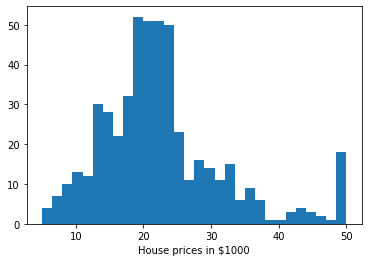

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(data['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

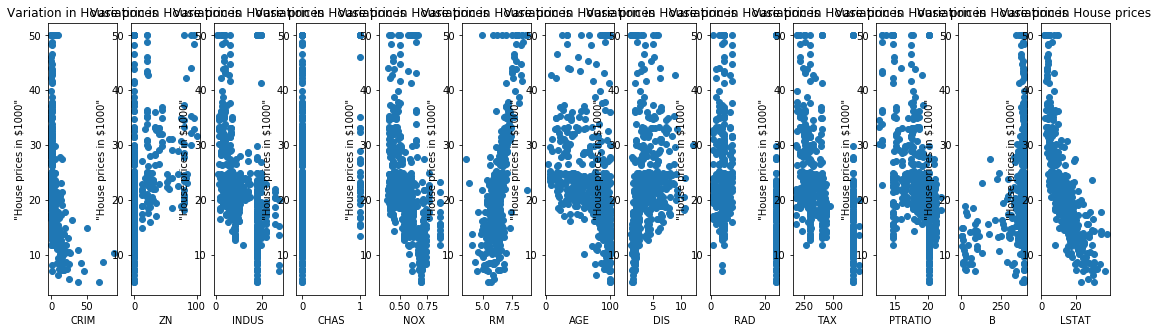

In [30]:
plt.figure(figsize=(750, 5))

features = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
target = data['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

### Splitting into test and training set

In [31]:
# Input Data
x = boston_data.data

# Output Data 
y = boston_data.target 

In [32]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, random_state = 50)

In [33]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape)

xtrain shape :  (404, 13)
xtest shape  :  (102, 13)
ytrain shape :  (404,)
ytest shape  :  (102,)


### Training and testing the model

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
ypred = lr.predict(xtest)
print(ypred)

[12.27194543 25.68626233 19.57395825 29.69673515 21.78378986 23.30416025
 16.26897462 16.74213681 13.03381182 25.23581608 14.0476147  29.31851007
 17.28001499 35.38563597 18.18304391 14.11102404 14.06010762 29.34424892
 23.38359092 25.28493404 24.73839718 36.56003645 31.54492657 19.19496009
 20.94366145 16.80319423 11.34565665 24.62814474 31.07336327 23.42393708
 20.95032917  6.13217912 30.12943717 35.55906551 21.32917047 32.76649066
 35.44119999 20.70070033 29.3019616  39.77573541 39.35077931 12.96741265
 21.64142271 25.32155452  2.92589811 14.26983134 22.44231732 34.14540761
 27.46119658 21.31079073 30.71096005 25.61643089 15.22808618 19.30353306
 25.31739831 22.27278961 32.91253104 24.51036663 19.3949359  19.02236518
 15.81321664 21.10472439 15.37221298 23.69304058 19.91995469 20.16042028
 15.76485617 23.60658014 25.31400733 19.81407841 30.07149248  7.33643835
 18.66772187 20.82051958 20.67521317 20.10022011 13.62086705 10.15842803
 17.87799545 21.02207413 20.18278269 23.50872475 22

In [14]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error : ', metrics.mean_absolute_error(ytest, ypred))
print('Mean Square Error : ', metrics.mean_squared_error(ytest, ypred))
print('RMSE', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print('R squared error', metrics.r2_score(ytest, ypred))

Mean Absolute Error :  3.4021092754056212
Mean Square Error :  26.345537363313255
RMSE 5.1327904071093
R squared error 0.6573857941343239


In [16]:
print(lr.coef_)

[-1.04683734e-01  3.94173679e-02  5.97497992e-02  8.49189549e-01
 -2.11417205e+01  4.18935210e+00  6.15729868e-03 -1.45337348e+00
  2.97609192e-01 -1.36194161e-02 -1.09117880e+00  7.84352525e-03
 -4.77003618e-01]
